In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_lines(file_handle):
    for line in file_handle:
        line = line.split('#!')[0].strip()
        if not line:
            continue
        yield line

The following two plots use the output of
```bash
plumed sum_hills --bin 360,15 --min -pi,0 --max pi,15 --hills HILLS_2D
```

Note that using 15 bins from 0 to 15 puts lambda values exactly on the integer values (15 bins, 16 boundaries from 0 to 15). The width of the Gaussian in lambda dimension is very narrow, so "closer to integers" is likely not good enough.

## Trial 1

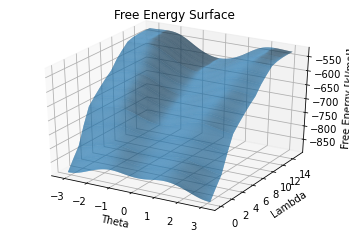

In [3]:
# Plot FE surface
theta_ = []
lambda_ = []
fes_ = []
with open('trial_1/fes.dat') as fes_file:
    for line in get_lines(fes_file):
        fields = [float(n) for n in line.split()]
        theta_.append(fields[0])
        lambda_.append(fields[1])
        fes_.append(fields[2])

theta_ = np.array(theta_)
lambda_ = np.array(lambda_)
fes_ = np.array(fes_)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_trisurf(theta_, lambda_, fes_)
ax.set_xlabel('Theta')
ax.set_ylabel('Lambda')
ax.set_zlabel('Free Energy [kJ/mol]')
ax.set_title('Free Energy Surface')
plt.show()

* Very large difference between lower states and upper states
* Poorly visited upper λ states?

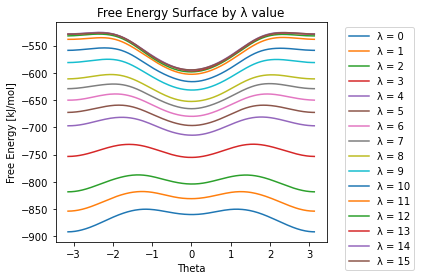

In [4]:
fig, ax = plt.subplots()
for lam in np.sort(np.unique(lambda_)):
    ax.plot(theta_[lambda_ == lam], fes_[lambda_ == lam], label=f'λ = {lam:.0f}')
ax.legend(bbox_to_anchor=(1.05, 1))
ax.set_xlabel('Theta')
ax.set_ylabel('Free Energy [kJ/mol]')
ax.set_title('Free Energy Surface by λ value')
plt.tight_layout()
plt.show()

The next two plots use the unedited `HILLS_2D` file as an input

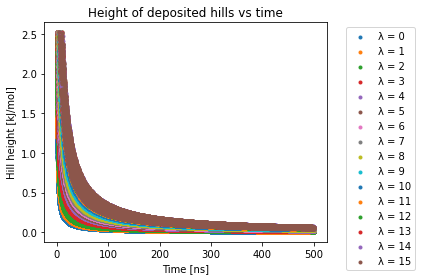

In [5]:
# Plot deposited hills
time_ = []
height_ = []
theta_ = []
lambda_ = []
with open('trial_1/HILLS_2D') as hills_file:
    for line in get_lines(hills_file):
        fields = [float(n) for n in line.split()]
        time_.append(fields[0])
        height_.append(fields[-2])
        theta_.append(fields[1])
        lambda_.append(fields[2])

time_ = np.array(time_) * 1e-3
height_ = np.array(height_)
theta_ = np.array(theta_)
lambda_ = np.array(lambda_)

fig, ax = plt.subplots()
for lam in np.sort(np.unique(lambda_)):
    ax.scatter(time_[lambda_ == lam], height_[lambda_ == lam], marker='.', label=f'λ = {lam:.0f}')
ax.legend(bbox_to_anchor=(1.05, 1))
ax.set_xlabel('Time [ns]')
ax.set_ylabel('Hill height [kJ/mol]')
ax.set_title('Height of deposited hills vs time')
plt.tight_layout()
plt.show()

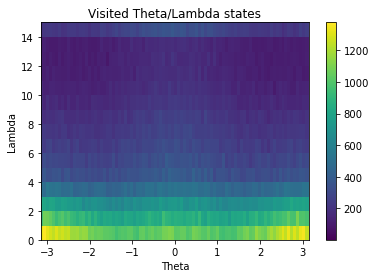

In [6]:
fig, ax = plt.subplots()
cmap = plt.cm.viridis
cmap.set_under('white')
plt.hist2d(theta_, lambda_, bins=(90, 15), cmap=cmap, vmin=1)
plt.colorbar()
ax.set_xlabel('Theta')
ax.set_ylabel('Lambda')
ax.set_title('Visited Theta/Lambda states')
plt.show()

/home/wei-tse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/home/wei-tse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


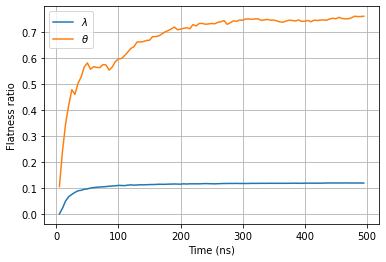

In [7]:
# Here we analyze the flatness of the lambda distribution as a function of time (this takes long)
lambda_flatness, theta_flatness = [], []
for i in np.arange(0, len(lambda_), 5000):
    lambda_hist = np.histogram(lambda_[:i], bins=16, range=(-0.5, 15.5))[0]
    theta_hist = np.histogram(theta_[:i], bins=360)[0]
    lambda_flatness.append(min(lambda_hist) / max(lambda_hist))
    theta_flatness.append(min(theta_hist) / max(theta_hist))

plt.figure()
plt.plot(time_[::5000], lambda_flatness, label='$\lambda$')
plt.plot(time_[::5000], theta_flatness, label=r'$\theta$')
plt.xlabel('Time (ns)')
plt.ylabel('Flatness ratio')
plt.legend()
plt.grid()

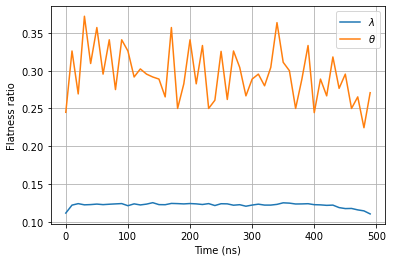

In [8]:
# The flatness ratio of each window
lambda_flatness, theta_flatness = [], []
for i in np.arange(0, len(lambda_), 10000):
    lambda_hist = np.histogram(lambda_[i:i+100000], bins=16, range=(-0.5, 15.5))[0]
    theta_hist = np.histogram(theta_[i:i+10000], bins=360)[0]
    lambda_flatness.append(min(lambda_hist) / max(lambda_hist))
    theta_flatness.append(min(theta_hist) / max(theta_hist))

plt.figure()
plt.plot(time_[::10000], lambda_flatness, label='$\lambda$')
plt.plot(time_[::10000], theta_flatness, label=r'$\theta$')
plt.xlabel('Time (ns)')
plt.ylabel('Flatness ratio')
plt.legend()
plt.grid()

## Trial 2

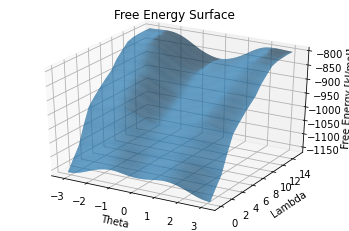

In [9]:
# Plot FE surface
theta_ = []
lambda_ = []
fes_ = []
with open('trial_2/fes.dat') as fes_file:
    for line in get_lines(fes_file):
        fields = [float(n) for n in line.split()]
        theta_.append(fields[0])
        lambda_.append(fields[1])
        fes_.append(fields[2])

theta_ = np.array(theta_)
lambda_ = np.array(lambda_)
fes_ = np.array(fes_)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_trisurf(theta_, lambda_, fes_)
ax.set_xlabel('Theta')
ax.set_ylabel('Lambda')
ax.set_zlabel('Free Energy [kJ/mol]')
ax.set_title('Free Energy Surface')
plt.show()

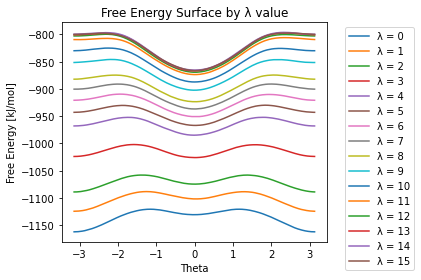

In [10]:
fig, ax = plt.subplots()
for lam in np.sort(np.unique(lambda_)):
    ax.plot(theta_[lambda_ == lam], fes_[lambda_ == lam], label=f'λ = {lam:.0f}')
ax.legend(bbox_to_anchor=(1.05, 1))
ax.set_xlabel('Theta')
ax.set_ylabel('Free Energy [kJ/mol]')
ax.set_title('Free Energy Surface by λ value')
plt.tight_layout()
plt.show()

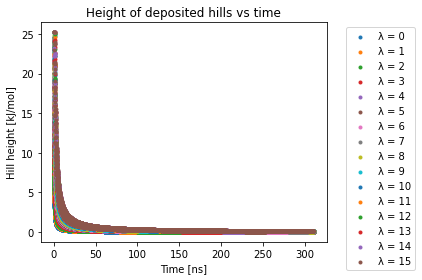

In [11]:
# Plot deposited hills
time_ = []
height_ = []
theta_ = []
lambda_ = []
with open('trial_2/HILLS_2D') as hills_file:
    for line in get_lines(hills_file):
        fields = [float(n) for n in line.split()]
        time_.append(fields[0])
        height_.append(fields[-2])
        theta_.append(fields[1])
        lambda_.append(fields[2])

time_ = np.array(time_) * 1e-3
height_ = np.array(height_)
theta_ = np.array(theta_)
lambda_ = np.array(lambda_)

fig, ax = plt.subplots()
for lam in np.sort(np.unique(lambda_)):
    ax.scatter(time_[lambda_ == lam], height_[lambda_ == lam], marker='.', label=f'λ = {lam:.0f}')
ax.legend(bbox_to_anchor=(1.05, 1))
ax.set_xlabel('Time [ns]')
ax.set_ylabel('Hill height [kJ/mol]')
ax.set_title('Height of deposited hills vs time')
plt.tight_layout()
plt.show()

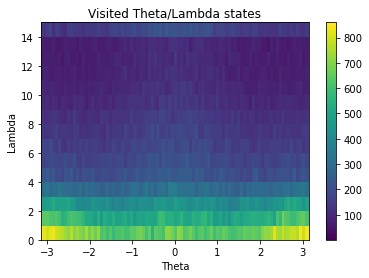

In [12]:
fig, ax = plt.subplots()
cmap = plt.cm.viridis
cmap.set_under('white')
plt.hist2d(theta_, lambda_, bins=(90, 15), cmap=cmap, vmin=1)
plt.colorbar()
ax.set_xlabel('Theta')
ax.set_ylabel('Lambda')
ax.set_title('Visited Theta/Lambda states')
plt.show()

/home/wei-tse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/home/wei-tse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


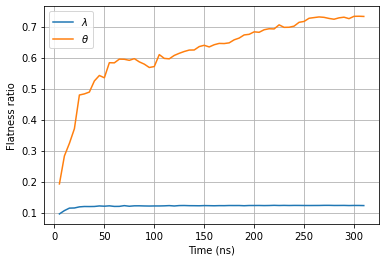

In [13]:
# Here we analyze the flatness of the lambda distribution as a function of time (this takes long)
lambda_flatness, theta_flatness = [], []
for i in np.arange(0, len(lambda_), 5000):
    lambda_hist = np.histogram(lambda_[:i], bins=16, range=(-0.5, 15.5))[0]
    theta_hist = np.histogram(theta_[:i], bins=360)[0]
    lambda_flatness.append(min(lambda_hist) / max(lambda_hist))
    theta_flatness.append(min(theta_hist) / max(theta_hist))

plt.figure()
plt.plot(time_[::5000], lambda_flatness, label='$\lambda$')
plt.plot(time_[::5000], theta_flatness, label=r'$\theta$')
plt.xlabel('Time (ns)')
plt.ylabel('Flatness ratio')
plt.legend()
plt.grid()

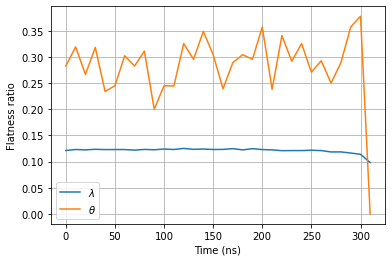

In [14]:
# The flatness ratio of each window
lambda_flatness, theta_flatness = [], []
for i in np.arange(0, len(lambda_), 10000):
    lambda_hist = np.histogram(lambda_[i:i+100000], bins=16, range=(-0.5, 15.5))[0]
    theta_hist = np.histogram(theta_[i:i+10000], bins=360)[0]
    lambda_flatness.append(min(lambda_hist) / max(lambda_hist))
    theta_flatness.append(min(theta_hist) / max(theta_hist))

plt.figure()
plt.plot(time_[::10000], lambda_flatness, label='$\lambda$')
plt.plot(time_[::10000], theta_flatness, label=r'$\theta$')
plt.xlabel('Time (ns)')
plt.ylabel('Flatness ratio')
plt.legend()
plt.grid()

## Convergence speed

In [15]:
# Here we analyze the time for each trial when the number of counts of the last state hit 100
import plumed
data_1 = plumed.read_as_pandas('trial_1/COLVAR')
data_2 = plumed.read_as_pandas('trial_2/COLVAR')

In [35]:
data_3 = plumed.read_as_pandas('trial_3/COLVAR')
data_4 = plumed.read_as_pandas('trial_4/COLVAR')

In [30]:
def analyze_convergence(data):
    counts = np.zeros([16, 1])
    for i in range(len(data)):
        state = int(data.iloc[i]["lambda"])
        counts[state] += 1
        if counts[-1] == 100:
            t = data.iloc[i]["time"]
            break
    print(counts)
    return t

In [32]:
analyze_convergence(data_1)

[[75633.]
 [57576.]
 [43024.]
 [24314.]
 [14381.]
 [10559.]
 [ 7670.]
 [ 5184.]
 [ 3228.]
 [ 1206.]
 [  758.]
 [  213.]
 [  222.]
 [  156.]
 [  192.]
 [  100.]]


4888.300232

In [31]:
analyze_convergence(data_2)

[[7517.]
 [5819.]
 [3959.]
 [2452.]
 [1322.]
 [1157.]
 [ 725.]
 [ 599.]
 [ 189.]
 [ 109.]
 [  69.]
 [  19.]
 [  13.]
 [  48.]
 [  91.]
 [ 100.]]


483.74002300000006

In [34]:
analyze_convergence(data_3)

[[43147.]
 [34729.]
 [29320.]
 [19383.]
 [11645.]
 [ 8574.]
 [ 6269.]
 [ 4408.]
 [ 2537.]
 [ 1077.]
 [  854.]
 [  218.]
 [  158.]
 [  199.]
 [   56.]
 [  100.]]


3253.460155

In [36]:
analyze_convergence(data_4)

[[4695.]
 [4062.]
 [3288.]
 [2332.]
 [1432.]
 [1197.]
 [ 637.]
 [ 803.]
 [ 708.]
 [ 319.]
 [  80.]
 [ 136.]
 [  86.]
 [  87.]
 [ 171.]
 [ 100.]]


402.640019